# Web Scraping with API Integration

### Importing Necessary Libraries

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

### Defining the GitHub Username and API URL

In [2]:
username = 'suhasmaddali' 
url = f'https://api.github.com/users/{username}/repos'

### Sending the API Request to Get the Data

In [3]:
response = requests.get(url)

###  Checking if the Request was Successful

In [4]:
if response.status_code == 200:
    print("Request successful!")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

Request successful!


### Converting the JSON Data into a Pandas DataFrame

In [5]:
# Converting the JSON response to a Python dictionary
repos_data = response.json()

# Converting the dictionary to a DataFrame
repos_df = pd.DataFrame(repos_data)

### Displaying the Data 

In [6]:
repos_df.head()

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,license,allow_forking,is_template,web_commit_signoff_required,topics,visibility,forks,open_issues,watchers,default_branch
0,432516790,R_kgDOGceutg,Academic-Transcripts,suhasmaddali/Academic-Transcripts,False,"{'login': 'suhasmaddali', 'id': 53935116, 'nod...",https://github.com/suhasmaddali/Academic-Trans...,This repository contains academic transcripts....,False,https://api.github.com/repos/suhasmaddali/Acad...,...,None,True,False,False,[],public,0,0,1,main
1,442602945,R_kgDOGmGVwQ,Adare-Restaurant-Webpage,suhasmaddali/Adare-Restaurant-Webpage,False,"{'login': 'suhasmaddali', 'id': 53935116, 'nod...",https://github.com/suhasmaddali/Adare-Restaura...,A website is designed with HTML5 and CSS3 to h...,False,https://api.github.com/repos/suhasmaddali/Adar...,...,None,True,False,False,[],public,0,0,1,main
2,430258554,R_kgDOGaU5eg,Airbnb-Home-Prices-Prediction,suhasmaddali/Airbnb-Home-Prices-Prediction,False,"{'login': 'suhasmaddali', 'id': 53935116, 'nod...",https://github.com/suhasmaddali/Airbnb-Home-Pr...,"In this project, the housing prices from Airbn...",False,https://api.github.com/repos/suhasmaddali/Airb...,...,None,True,False,False,[],public,1,0,4,main
3,580535839,R_kgDOIppGHw,Airline-Twitter-Sentiment-Prediction,suhasmaddali/Airline-Twitter-Sentiment-Prediction,False,"{'login': 'suhasmaddali', 'id': 53935116, 'nod...",https://github.com/suhasmaddali/Airline-Twitte...,This coding repository showcases various featu...,False,https://api.github.com/repos/suhasmaddali/Airl...,...,None,True,False,False,[],public,0,0,2,main
4,474520830,R_kgDOHEic_g,Article-Recommender-System,suhasmaddali/Article-Recommender-System,False,"{'login': 'suhasmaddali', 'id': 53935116, 'nod...",https://github.com/suhasmaddali/Article-Recomm...,This repository describes various ways of solv...,False,https://api.github.com/repos/suhasmaddali/Arti...,...,None,True,False,False,[],public,0,0,2,main


### Saving the DataFrame to a CSV file

In [7]:
repos_df.to_csv(f'{username}_repos.csv', index=False)
print(f"Data saved to {username}_repos.csv")

Data saved to suhasmaddali_repos.csv


### Loading the Dataset

In [8]:
repos_df = pd.read_csv('suhasmaddali_repos.csv')

### Checking the shape of the DataFrame

In [9]:
print(f"Shape of the DataFrame: {repos_df.shape}")

Shape of the DataFrame: (30, 79)


### Displaying the columns

In [10]:
print("Columns in the DataFrame:")
print(repos_df.columns)

Columns in the DataFrame:
Index(['id', 'node_id', 'name', 'full_name', 'private', 'owner', 'html_url',
       'description', 'fork', 'url', 'forks_url', 'keys_url',
       'collaborators_url', 'teams_url', 'hooks_url', 'issue_events_url',
       'events_url', 'assignees_url', 'branches_url', 'tags_url', 'blobs_url',
       'git_tags_url', 'git_refs_url', 'trees_url', 'statuses_url',
       'languages_url', 'stargazers_url', 'contributors_url',
       'subscribers_url', 'subscription_url', 'commits_url', 'git_commits_url',
       'comments_url', 'issue_comment_url', 'contents_url', 'compare_url',
       'merges_url', 'archive_url', 'downloads_url', 'issues_url', 'pulls_url',
       'milestones_url', 'notifications_url', 'labels_url', 'releases_url',
       'deployments_url', 'created_at', 'updated_at', 'pushed_at', 'git_url',
       'ssh_url', 'clone_url', 'svn_url', 'homepage', 'size',
       'stargazers_count', 'watchers_count', 'language', 'has_issues',
       'has_projects', 'has_do

### Checking the Data Types

In [11]:
print("Data types of each column:")
print(repos_df.dtypes)

Data types of each column:
id                 int64
node_id           object
name              object
full_name         object
private             bool
                   ...  
visibility        object
forks              int64
open_issues        int64
watchers           int64
default_branch    object
Length: 79, dtype: object


### Checking for duplicates

In [12]:
duplicates = repos_df.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")

Number of duplicate entries: 0


### Checking for Missing Values

In [13]:
missing_values = repos_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
id                0
node_id           0
name              0
full_name         0
private           0
                 ..
visibility        0
forks             0
open_issues       0
watchers          0
default_branch    0
Length: 79, dtype: int64


### Dropping Unnecessary Columns

In [14]:
repos_df.drop(columns=['node_id', 'private', 'owner', 'url', 'forks_url', 
                       'keys_url', 'collaborators_url', 'teams_url', 
                       'hooks_url', 'issue_events_url', 'events_url', 
                       'assignees_url', 'branches_url', 'tags_url', 
                       'blobs_url', 'git_tags_url', 'git_refs_url', 
                       'trees_url', 'statuses_url', 'languages_url', 
                       'stargazers_url', 'contributors_url', 
                       'subscribers_url', 'subscription_url', 
                       'commits_url', 'git_commits_url', 'comments_url', 
                       'issue_comment_url', 'contents_url', 'compare_url', 
                       'merges_url', 'archive_url', 'downloads_url', 
                       'issues_url', 'pulls_url', 'milestones_url', 
                       'notifications_url', 'labels_url', 'releases_url', 
                       'deployments_url', 'git_url', 'ssh_url', 
                       'clone_url', 'svn_url', 'size', 
                       'has_issues', 'has_projects', 'has_downloads', 
                       'has_wiki', 'has_pages', 'has_discussions', 
                       'visibility'], inplace=True)

### Handling the Missing Values (dropping rows where 'language' is missing)

In [15]:
repos_df = repos_df.dropna(subset=['language'])

### Converting date columns to datetime format

In [16]:
repos_df['created_at'] = pd.to_datetime(repos_df['created_at'])
repos_df['updated_at'] = pd.to_datetime(repos_df['updated_at'])

### Display Data Info

In [18]:
print(repos_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 1 to 29
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   id                           21 non-null     int64              
 1   name                         21 non-null     object             
 2   full_name                    21 non-null     object             
 3   html_url                     21 non-null     object             
 4   description                  18 non-null     object             
 5   fork                         21 non-null     bool               
 6   created_at                   21 non-null     datetime64[ns, UTC]
 7   updated_at                   21 non-null     datetime64[ns, UTC]
 8   pushed_at                    21 non-null     object             
 9   homepage                     0 non-null      float64            
 10  stargazers_count             21 non-null     int64       

### Analyzing the number of repositories created over time

In [19]:
repos_df['year_created'] = repos_df['created_at'].dt.year
repos_per_year = repos_df['year_created'].value_counts().sort_index()

print("Number of repositories created per year:")
print(repos_per_year)

Number of repositories created per year:
year_created
2019     2
2021    12
2022     3
2023     2
2024     2
Name: count, dtype: int64


### Plotting the number of repositories created over the years

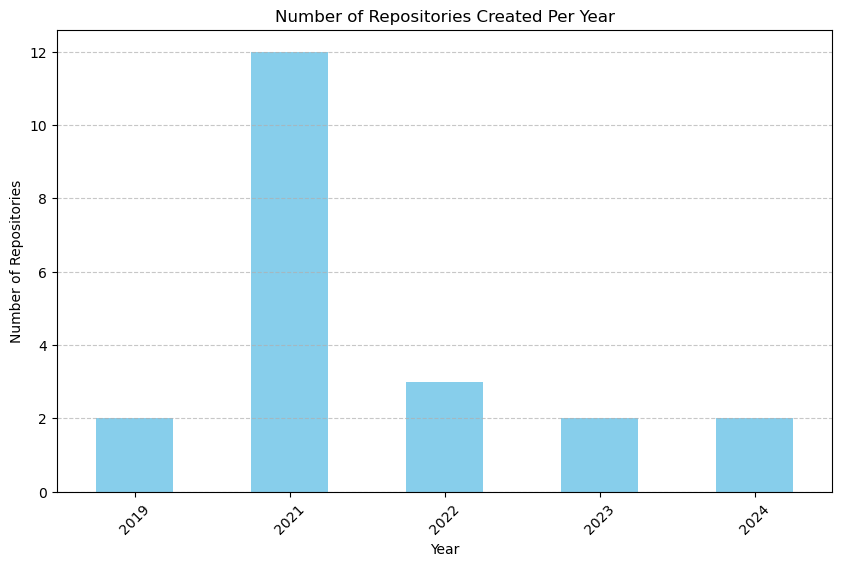

In [20]:
plt.figure(figsize=(10, 6))
repos_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Repositories Created Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Repositories')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Occurrences of each programming language

In [21]:
language_counts = repos_df['language'].value_counts()
language_counts

language
Jupyter Notebook    18
HTML                 1
CSS                  1
JavaScript           1
Name: count, dtype: int64

### Plotting the distribution of programming languages

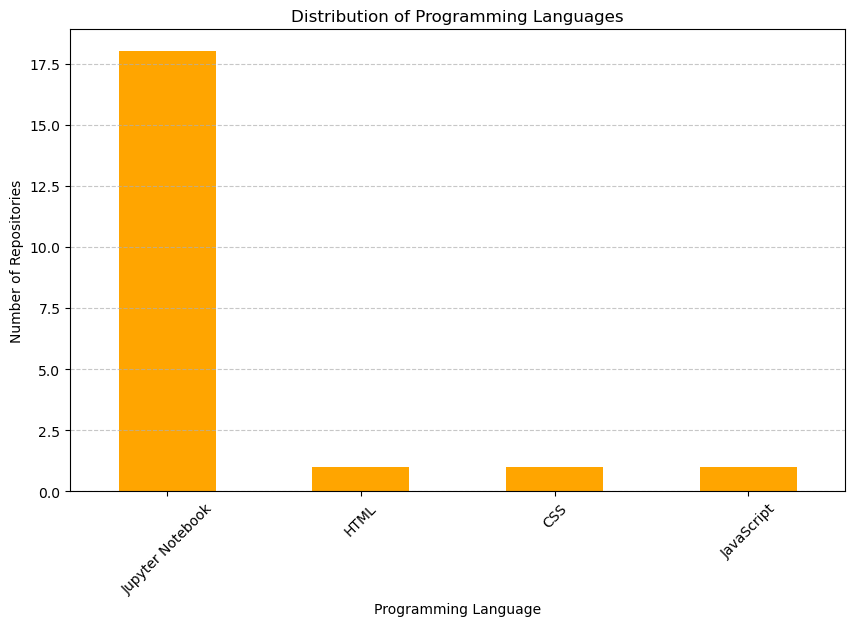

In [22]:
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Programming Languages')
plt.xlabel('Programming Language')
plt.ylabel('Number of Repositories')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Summary of findings

In [23]:
summary_report = {
    "Number of Repositories": repos_df.shape[0],
    "Languages Used": repos_df['language'].unique(),
    "Years Active": repos_df['year_created'].unique()
}

print("Summary Report:")
for key, value in summary_report.items():
    print(f"{key}: {value}")


Summary Report:
Number of Repositories: 21
Languages Used: ['HTML' 'Jupyter Notebook' 'CSS' 'JavaScript']
Years Active: [2021 2022 2019 2023 2024]
